Build a ChemProp model to predict antibiotic activity.  This notebook, and subsequent notebooks, are my attempt to reproduce the work in a recent paper from John Stokes and coworkers at the Broad Institute and MIT, ["A Deep Learning Approach to Antibiotic Discovery"](https://www.sciencedirect.com/science/article/pii/S0092867420301021)

Setup the appropriate imports

In [1]:
import pandas as pd
from rdkit import Chem
from tqdm.notebook import tqdm

RDKit WARNING: [17:14:08] Enabling RDKit 2019.09.3 jupyter extensions


Read the spreadsheet witht the data from Stokes et al

In [14]:
df = pd.read_excel("mmc1.xlsx",sheet_name=1,skiprows=1)

Look at the first few lines from the dataframe

In [15]:
df.head()

,Mean_Inhibition,SMILES,Name,Activity
0,0.041572,Cc1cc(O)c(C(=O)NC(C(=O)NC2C(=O)N3C(C(=O)O)=C(C...,CEFPIRAMIDE,Active
1,0.041876,CON=C1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)CC...,GEMIFLOXACIN MESYLATE,Active
2,0.041916,CCC(C)CCCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O...,POLYMYXIN B SULFATE,Active
3,0.041964,Cl.N=C(N)n1cccn1,PRAXADINE HYDROCHLORIDE,Active
4,0.042295,Cl.Cl.N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(...,CHLORHEXIDINE DIHYDROCHLORIDE,Active


Make a barplot of the activity distribution, notice that the dataset is imbalanced.

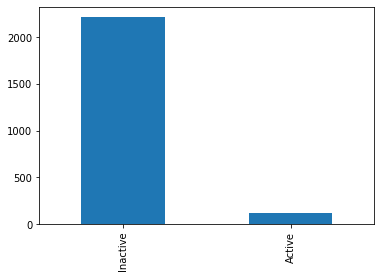

In [17]:
ax = df.Activity.value_counts().plot(kind="bar")

Create a new field which represents the activity as an integer (Active = 1, Inactive = 0)

In [19]:
df['active'] = [int(x == "Active") for x in df.Activity]

In [20]:
df.head()

,Mean_Inhibition,SMILES,Name,Activity,active
0,0.041572,Cc1cc(O)c(C(=O)NC(C(=O)NC2C(=O)N3C(C(=O)O)=C(C...,CEFPIRAMIDE,Active,1
1,0.041876,CON=C1CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)CC...,GEMIFLOXACIN MESYLATE,Active,1
2,0.041916,CCC(C)CCCCC(=O)NC(CCN)C(=O)NC(C(=O)NC(CCN)C(=O...,POLYMYXIN B SULFATE,Active,1
3,0.041964,Cl.N=C(N)n1cccn1,PRAXADINE HYDROCHLORIDE,Active,1
4,0.042295,Cl.Cl.N=C(NCCCCCCNC(=N)NC(=N)Nc1ccc(Cl)cc1)NC(...,CHLORHEXIDINE DIHYDROCHLORIDE,Active,1


Let's double check to ensure that we have the correct number of active and inactive compounds

In [10]:
df.Activity.value_counts(),df.active.value_counts()

(Inactive    2215
 Active       120
 Name: Activity, dtype: int64,
 0    2215
 1     120
 Name: active, dtype: int64)

Write SMILES and active fields out in a csv file

In [12]:
df[["SMILES","active"]].to_csv("mmcl.csv",index=False)

Uncomment the cell below to run the training.  I think I've reproduced the hyperparameters from the Cell paper, but I may have missed something or gotten something wrong

In [13]:
#%python ~/software/chemprop/train.py --data_path mmcl.csv --dataset_type classification --save_dir chemprop_train --gpu 0 --features_generator rdkit_2d_normalized --no_features_scaling --depth 5 --hidden_size 1600 --ffn_num_layers 1 --dropout 0.35 --ensemble_size 20